In [10]:
from sage.all import *

In [11]:
#Returns the volume of G

def vol(G):
    V = 0
    for v in G.vertices():
        V+=G.degree(v)
    return V

In [12]:
#Returns the degree matrix D of graph G

def deg_matrix(G):
    return diagonal_matrix([G.degree(v) for v in G.vertices()], sparse = False)

In [13]:
#returns Ihara Matrix of G

def ihara_matrix(G):
    A = G.adjacency_matrix(); D=deg_matrix(G); I = identity_matrix(G.order()); Z=matrix.zero(G.order())
    return block_matrix(QQbar, [[A,D-I],[-I,Z]], subdivide = false)

In [14]:
#Returns the normal transition probabillity matrix P of graph G

def trans_prob_matrix(G):
    A = G.adjacency_matrix()
    D= diagonal_matrix([G.degree(v) for v in G.vertices()])
    Dinv = D^(-1)
    P = Dinv * A
    return P

In [15]:
def edge_ordering_dictionary(G):
    D=dict()
    i=0
    for u in G.vertices():
        for v in G.neighbors(u):
            D.setdefault((u,v),i)
            i=i+1
    return D

In [16]:
#Creates probability matrix of the non-backtracking matrix 

def trans_prob_matrix_nb(G):
    L = []
    D=edge_ordering_dictionary(G)
    for a in D.keys():
        i=D[a]
        for b in D.keys():
            j=D[b]
            u=a[0]
            v=a[1]
            x=b[0]
            y=b[1]
            if v==x and y!=u:
                L.append(float(1)/(G.degree(v)-1))
            else: L.append(0)
    P = matrix(vol(G), L)
    return P

In [17]:
#Creates normal edge adjacency matrix C for any graph G

def edge_adjacency_matrix(G):
    L = []
    D=edge_ordering_dictionary(G)
    for a in D.keys():
        i=D[a]
        for b in D.keys():
            j=D[b]
            u=a[0]
            v=a[1]
            x=b[0]
            y=b[1]
            if v==x:
                L.append(1)
            else: L.append(0)
    B = matrix(vol(G), L)
    return B

In [18]:
#creates non-backtracking matrix B for any graph G

def edge_adjacency_nb_matrix(G):
    L = []
    D=edge_ordering_dictionary(G)
    for a in D.keys():
        i=D[a]
        for b in D.keys():
            j=D[b]
            u=a[0]
            v=a[1]
            x=b[0]
            y=b[1]
            if v==x and y!=u:
                L.append(1)
            else: L.append(0)
    B = matrix(vol(G), L) 
    return B

In [19]:
#uses proposition 5.3 to calculate eigenvalues of Ihara Matrix from A

def compute_K_evals(G):
    K = ihara_matrix(G)
    for A_evec in G.eigenvectors():
        print("lambda: " + str(A_evec[0]))
        for K_evec in K.eigenvectors_right():
            mu = K_evec[0]
            print("Actual mu: " + str(mu))
            G1 = A_evec
            lam = G1[0]
            x_vectors = G1[1]
            for A_evec_same_eval in x_vectors:
                x = list(A_evec_same_eval)
                x = vector(x)
                B_evec = K_evec[1]
                for K_evec_same_eval in B_evec:
                    evec_list = list(K_evec_same_eval)
                    evec_half = evec_list[G.order():]
                    y = vector(evec_half)
                    D = deg_matrix(G)
                    if x*y != 0:
                        mu1_calculated = (lam + sqrt(lam^2 - 4/(x*y)*x*(D - identity_matrix(len(y)))*y)) / 2
                        mu2_calculated = (lam - sqrt(lam^2 - 4/(x*y)*x*(D - identity_matrix(len(y)))*y)) / 2
                        if mu == mu1_calculated or mu == mu2_calculated:
                            print("CORRECT")
                        else:
                            print("INCORRECT")
                    else: 
                        print("x and y are orthogonal")
        print()

In [20]:
#Tries to find all eigenvalues of Ihara Matrix using Proposition 5.3. If not all are found, 
# it prints off the graph of G and a list of eigenvalues that weren't calculated.

#Takes a long time

def find_eigenvalues(G):    
    K = ihara_matrix(G)
    set_of_evals = list(K.eigenvalues())
    for A_evec in G.eigenvectors():
        for K_evec in K.eigenvectors_right():
            mu = K_evec[0]
            lam = A_evec[0]
            x_vectors = A_evec[1]
            for A_evec_same_eval in x_vectors:
                x = list(A_evec_same_eval)
                x = vector(x)
                K_evectors = K_evec[1]
                for K_evec_same_eval in K_evectors:
                    evec_list = list(K_evec_same_eval)
                    evec_half = evec_list[G.order():]
                    y = vector(evec_half)
                    D = deg_matrix(G)
                    if x*y != 0:
                        mu1_calculated = (lam + sqrt(lam^2 - 4/(x*y)*x*(D - identity_matrix(len(y)))*y)) / 2
                        mu2_calculated = (lam - sqrt(lam^2 - 4/(x*y)*x*(D - identity_matrix(len(y)))*y)) / 2
                        if mu == mu1_calculated or mu == mu2_calculated:
                            if mu in set_of_evals:
                                set_of_evals.remove(mu)
    if len(set_of_evals) == 0:
        print("All eigenvalues found")
    else:
        print("These eigenvalues were not found: " + str(set_of_evals))
        show(G)

In [21]:
#returns list of eigenvectors corresponding to jth eigenvalue

def get_ihara_evec(G,j):
    K = ihara_matrix(G)
    K_i = K.eigenvectors_right()[j]
    K_i_evec = K_i[1]
    return K_i_evec

In [22]:
#tells you if the Ihara matrix is diagonalizable

def is_it_diagonalizable(list_of_graphs):
    for g in list_of_graphs:
        k = ihara_matrix(g)
        if k.is_diagonalizable() == False:
            show(g)
            #for d in g.degree_iterator():
            #    if d == 1:
            #        show(g)
        #else:
            #print("FALSE")

In [44]:
#tests cospectrality of B matrix

def are_cospectral(g1,g2):
    g1nb = edge_adjacency_nb_matrix(g1)
    g2nb = edge_adjacency_nb_matrix(g2)

    g1_k = ihara_matrix(g1)
    g2_k = ihara_matrix(g2)

    g1_nb_spectrum = g1nb.eigenvalues()
    g2_nb_spectrum = g2nb.eigenvalues()

    g1_k_spectrum = g1_k.eigenvalues()
    g2_k_spectrum = g2_k.eigenvalues()

    if g1_nb_spectrum == g2_nb_spectrum:
        print("cospectral in regards to non-backtracking matrices")
        show(g1)
        #print("g1 spectrum is " + str(g1_nb_spectrum))
        #print(g1nb)
        show(g2)
        #print("g2 spectrum is " + str(g2_nb_spectrum))
        #print(g2nb)
    else:
        print("NOT cospectral in regards to non-backtracking matrices")

    
    if g1_k_spectrum == g2_k_spectrum:
        print("cospectral in regards to ihara matrices")
        show(g1)
        #print("g1 spectrum is " + str(g1_k_spectrum))
        #print(g1nb)
        show(g2)
        #print("g2 spectrum is " + str(g2_k_spectrum))
        #print(g2nb)
    else:
        print("NOT cospectral in regards to ihara matrices")

In [49]:
#Testing cospectrality of graphs on minimum 2 degrees

all_spectrums = []
all_graphs = list(graphs.nauty_geng("9 -d2"))
for g in all_graphs:
    k_g = ihara_matrix(g)
    all_spectrums.append(k_g.eigenvalues())

graphs_length = len(all_spectrums)
for i in range (0,graphs_length):
    for j in range(0,graphs_length):
        if i != j and all_spectrums[i] == all_spectrums[j]:
            show(all_graphs[i])
            show(all_graphs[j])

KeyboardInterrupt: 

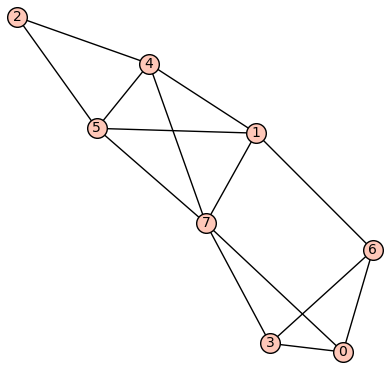

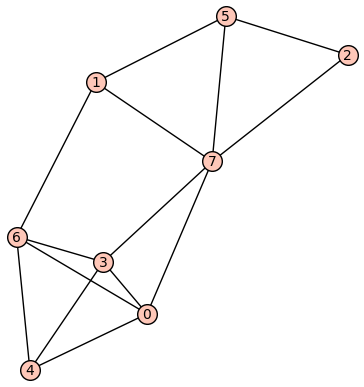

[-1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -0.50000000000000000? - 1.322875655532296?*I, -0.50000000000000000? + 1.322875655532296?*I, -0.50000000000000000? - 1.658312395177700?*I, -0.50000000000000000? + 1.658312395177700?*I, 2.643495440458896?, -1.030029677104706? - 1.210503775016449?*I, -1.030029677104706? + 1.210503775016449?*I, -0.7631892054447112? - 1.301076684619364?*I, -0.7631892054447112? + 1.301076684619364?*I, -0.01827458562921501? - 1.315623399589138?*I, -0.01827458562921501? + 1.315623399589138?*I, -0.00252671215935255? - 1.630996277868909?*I, -0.00252671215935255? + 1.630996277868909?*I, 0.9922724601085369? - 1.035984668889187?*I, 0.9922724601085369? + 1.035984668889187?*I]
[-1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -0.50000000000000000? - 1.322875655532296?*I, -0.50000000000000000? + 1.322875655532296?*I, -0.50000000000000000? - 1.658312395177700?*I, -0.50000000000000000? + 1.658312395177700?*I, 2.643495440458896?, -1.030029677104706? - 1.210503775016449?*I, -1.030

In [47]:
#Counter example to our 'conjecture' about cospectrality of B or K matrices

g1 = {0:[3,6,7], 6:[3,1], 7:[3,1,5,4], 4:[1,5,2], 5:[1,2]}
g1 = Graph(g1)
show(g1)

g2 = {0:[3,4,6,7], 3:[4,6,7], 6:[4,1], 5:[1,2,7], 7:[1,2]}
g2 = Graph(g2)
show(g2)

print(edge_adjacency_nb_matrix(g1).eigenvalues())
print(edge_adjacency_nb_matrix(g2).eigenvalues())
print()
print(ihara_matrix(g1).eigenvalues())
print(ihara_matrix(g2).eigenvalues())


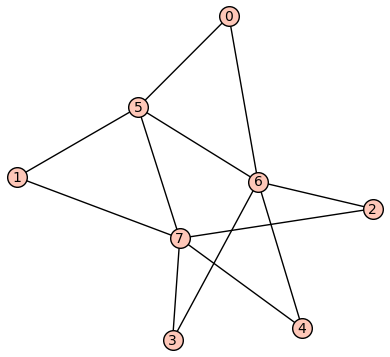

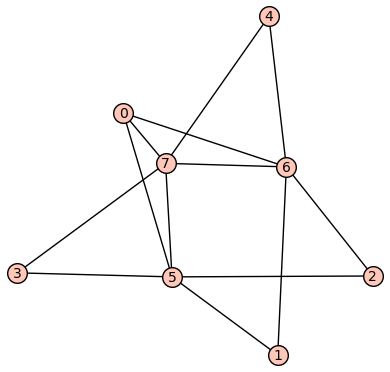

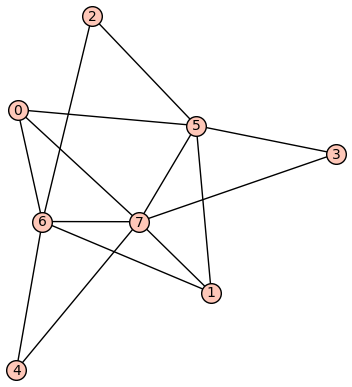

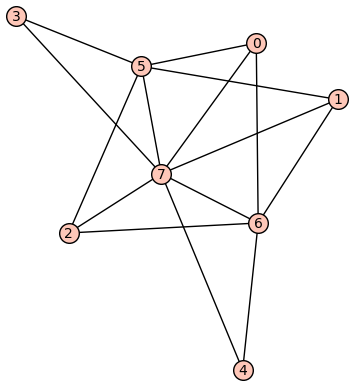

ValueError: intersection of non-overlapping intervals

In [62]:
#Testing diagonalizability of Ihara Matrix of graphs with 8 vertices, connected, and d_min >= 2


all_graphs = graphs.nauty_geng("8 8:0 -c -d2")
#print(len(list(list_of_graphs)))
#for g in all_graphs:
#    find_eigenvalues(g)
is_it_diagonalizable(all_graphs)

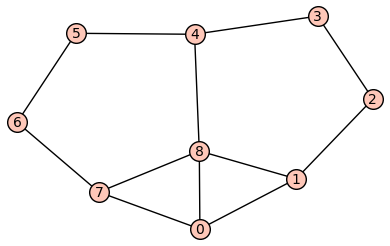

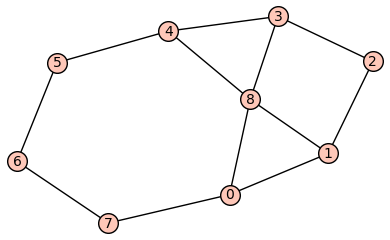

false
[1.795092474344487?, 1, 0.7756222420014765? + 0.951275381864930?*I, 0.7756222420014765? - 0.951275381864930?*I, 0.6745694095891947? + 0.8265587589563592?*I, 0.6745694095891947? - 0.8265587589563592?*I, 0.2288866292524979? + 1.238576997584343?*I, 0.2288866292524979? - 1.238576997584343?*I, 0.?e-54 + 1.242452821113171?*I, 0.?e-54 - 1.242452821113171?*I, -0.4914341036874043? + 1.361075314351993?*I, -0.4914341036874043? - 1.361075314351993?*I, -0.6745694095891947? + 0.8265587589563592?*I, -0.6745694095891947? - 0.8265587589563592?*I, -0.9533081368468846? + 0.6110869931621971?*I, -0.9533081368468846? - 0.6110869931621971?*I, -0.9573128678919288? + 1.080258348961655?*I, -0.9573128678919288? - 1.080258348961655?*I]
[1.802552580358086?, 1, 0.7777808020484684? + 0.7400359161132545?*I, 0.7777808020484684? - 0.7400359161132545?*I, 0.6654569511528135? + 1.102784715200295?*I, 0.6654569511528135? - 1.102784715200295?*I, 0.2270189250046534? + 1.186824173175317?*I, 0.2270189250046534? - 1.186824

In [16]:
#example of two cospectral graphs with minimum degree at least 2

g1 = {0:[1,7,8], 1:[8,2], 3:[2,4], 5:[4,6], 7:[6,8], 8:[4]}
g1 = Graph(g1)
show(g1)
g2 = {0:[1,7,8], 1:[8,2], 3:[2,8,4], 5:[4,6], 7:[6], 8:[4]}
g2 = Graph(g2)
show(g2)
are_cospectral(g1,g2)
k_g1 = ihara_matrix(g1)
k_g2 = ihara_matrix(g2)
print(k_g1.eigenvalues())

print(k_g2.eigenvalues())

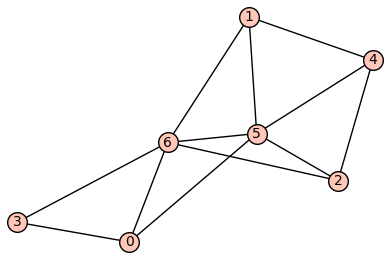

Is diagonalizable: False
[2.585399180895620?, 1, 0.6337669124478448? + 1.141714069356906?*I, 0.6337669124478448? - 1.141714069356906?*I, 0.?e-56 + 1.414213562373095?*I, 0.?e-56 - 1.414213562373095?*I, -0.3757575197436938? + 1.706562943488307?*I, -0.3757575197436938? - 1.706562943488307?*I, -1.050708983151961? + 1.128326170159466?*I, -1.050708983151961? - 1.128326170159466?*I, -0.50000000000000000? + 1.322875655532296?*I, -0.50000000000000000? + 1.322875655532296?*I, -0.50000000000000000? - 1.322875655532296?*I, -0.50000000000000000? - 1.322875655532296?*I]


KeyboardInterrupt: 

In [17]:
#reconstructing the counter-example to our conjecture about the diagonalizability of Ihara matrices


g = {0:[3,6,5], 1:[4,5,6], 2:[4,5,6], 3:[0,6], 4:[1,2,5], 5:[0,1,2,4,6], 6:[0,3,5]}
sad_graph = Graph(g)
show(sad_graph)
k_sad = ihara_matrix(sad_graph)
print("Is diagonalizable: " + str(k_sad.is_diagonalizable()))
print(k_sad.eigenvalues())
find_eigenvalues(sad_graph)

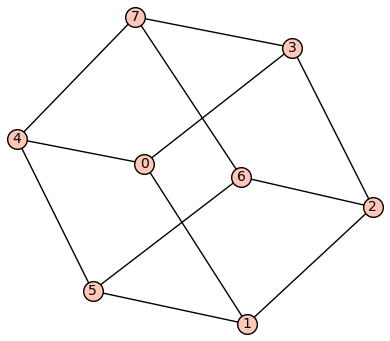

[0 1 0 1 1 0 0 0]
[1 0 1 0 0 1 0 0]
[0 1 0 1 0 0 1 0]
[1 0 1 0 0 0 0 1]
[1 0 0 0 0 1 0 1]
[0 1 0 0 1 0 1 0]
[0 0 1 0 0 1 0 1]
[0 0 0 1 1 0 1 0]

[0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
[0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0]
[1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
[0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
[0 0 

In [56]:
G = Graph({})
G.add_cycle([0,1,2,3])
G.add_cycle([4,5,6,7])
G.add_edges([(0,4),(1,5),(2,6),(3,7)])
show(G)
print(G.adjacency_matrix())
print()
print(edge_adjacency_nb_matrix(G))

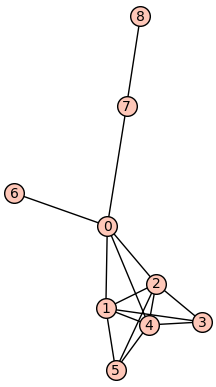

Ihara matrix is diagonalizable: False
[0, -1, -1, -2.432275894706459?, -1.239782941132468?, -0.5653180558400381?, 0.5820380767824201?, 1.431748412515937?, 4.223590402380607?]
lambda: 0
Actual mu: 3.111694220928247?
x and y are orthogonal
Actual mu: 1
x and y are orthogonal
Actual mu: -1.055847110464124? + 1.206703601948119?*I
x and y are orthogonal
Actual mu: -1.055847110464124? - 1.206703601948119?*I
x and y are orthogonal
Actual mu: 0.?e-76 + 1.414213562373095?*I
CORRECT
CORRECT
Actual mu: 0.?e-76 - 1.414213562373095?*I
CORRECT
CORRECT
Actual mu: -0.500000000000000? + 1.936491673103709?*I
x and y are orthogonal
x and y are orthogonal
Actual mu: -0.500000000000000? - 1.936491673103709?*I
x and y are orthogonal
x and y are orthogonal
Actual mu: 0
x and y are orthogonal
x and y are orthogonal

lambda: -1
Actual mu: 3.111694220928247?
x and y are orthogonal
x and y are orthogonal
Actual mu: 1
x and y are orthogonal
x and y are orthogonal
Actual mu: -1.055847110464124? + 1.206703601948119

In [19]:
#An example of proposition 5.3 calculating the eigenvalues of the Ihara Matrix of some graph on 9 vertices

G = deg_two_graph(6,0.5)
G.add_vertices([6, 7, 8])
G.add_edges([(6,0),(7,0),(8,7)])
show(G)
K = ihara_matrix(G)
print("Ihara matrix is diagonalizable: " + str(K.is_diagonalizable()))
print(G.adjacency_matrix().eigenvalues())
compute_K_evals(G)

cospectral in regards to non-backtracking matrices


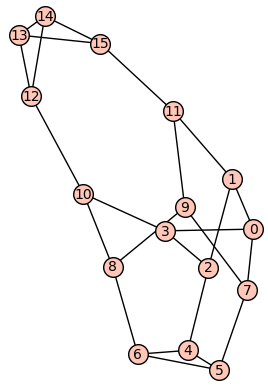

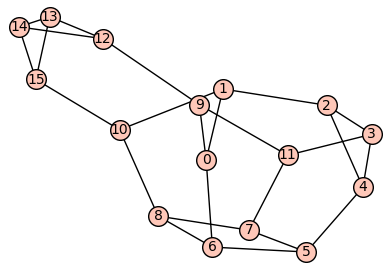

cospectral in regards to ihara matrices


In [24]:
#testing cospectral 3-regular graphs on 16 vertices

g1 = {0:[1,3,7], 2:[3,1,4], 5:[4,6,7], 6:[4,8], 9:[8,7,11], 10:[3,8,12], 11:[1,15], 13:[12,14,15], 14:[12,15],}
g2 = {0:[1,6,9], 2:[1,3,4], 3:[4,11], 5:[4,6,7], 8:[6,7,10], 9:[11,12], 10:[1,15], 11:[7], 13:[12,14,15], 14:[12,15]}
g1 = Graph(g1)
g2 = Graph(g2)
are_cospectral(g1,g2)

In [4]:
#using cospectral_graphs() built in function to find cospectral graphs
gen = graphs.nauty_geng("12 -d3 -D3")
len(list(gen))
#g = graphs.cospectral_graphs(12, graphs=graphs.nauty_geng(12, -d3, -D3))

94

In [26]:
g1 = {0:[2,3,4,5], 1:[2,3,4,5], 2:[3,6], 3:[4], 5:[4,7]}
g1 = Graph(g1)
g2 = {0:[2,3,4,5], 1:[2,3,4,5], 2:[3,6], 3:[4], 5:[4,7], 6:[7]}
g2 = Graph(g2)
are_cospectral(g1,g2)

NOT cospectral in regards to non-backtracking matrices
NOT cospectral in regards to ihara matrices


In [30]:
#These are two really big bi-regular graphs that are supposed to be cospectral. I screwed it up though

g1 = {0:[1,5,15], 1:[2,10], 2:[3,7], 3:[4,12], 4:[5,9], 6:[5,11,7], 8:[7,13,9], 10:[9,11], 12:[11,13], 14:[13,16,22], 16:[17,33], 17:[15,18], 18:[19,48], 19:[20,49], 20:[21,50], 21:[22,53], 23:[15,22,23], 24:[25,48], 25:[26,49], 26:[27,50], 27:[28,53], 28:[29,34], 29:[30,35], 30:[31,36], 31:[32,37], 32:[33,38], 33:[47], 34:[39,41], 35:[42,40], 36:[39,43], 37:[40,44], 38:[39,45], 47:[40,46], 41:[42,46], 43:[42,44], 45:[44,46], 51:[48,50,52], 52:[49,53]}
g1 = Graph(g1)
g2 = {0:[1,5,33], 1:[2,10], 2:[3,7], 3:[4,12], 4:[5,9], 6:[5,11,7], 8:[7,13,9], 10:[9,11], 12:[11,13], 13:[34], 15:[16,32,47], 16:[17,48], 17:[18,49], 18:[19,50], 19:[20,51], 20:[21,52], 21:[22,47], 22:[23,48], 23:[24,49], 24:[25,50], 25:[26,51], 26:[27,52], 27:[28,33], 28:[29,34], 29:[30,35], 30:[31,36], 31:[32,37], 32:[38], 41:[33,42,46], 42:[34,43], 43:[35,44], 44:[36,45], 45:[37,46], 46:[38], 39:[35,37,40], 40:[36,38], 53:[47,49,51], 54:[48,50,52]}
g2 = Graph(g2)
print(g1.adjacency_matrix().eigenvalues() == g2.adjacency_matrix().eigenvalues())

False
